In [1]:
from steps import preprocess
import matplotlib.pyplot as plt
import utils as u
# import mplleaflet

from models import pentzer2022 as pentzer2022
from visualization import papermode
papermode(plt, size=12)

In [2]:
abbr = "D18"
preprocess(abbr, verbose=False)
powdf = pentzer2022.pentzer2022(abbr,verbose=False)

D18: 100%|██████████| 245/245 [00:00<00:00, 9845.97it/s]


(-175.23275721698573,
 7.346415290361917,
 -131.02215935624633,
 6.1708775009894525)

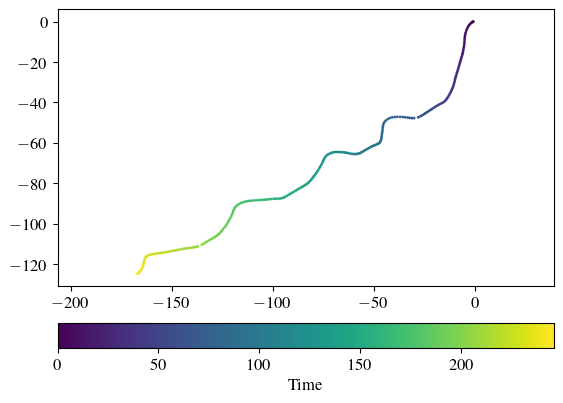

In [3]:
fig, ax = plt.subplots()
# ax.plot(powdf.px, powdf.py)
sc = ax.scatter(powdf.px, powdf.py, c=powdf.time_rel, s=1)
cb = fig.colorbar(sc,orientation="horizontal", pad=0.1, ax=ax)
cb.ax.set_xlabel("Time")
ax.axis("equal")

In [12]:
import utils.odom_utils as odou

coords = odou.transform_odom(
    powdf.px,
    powdf.py,
    parameters={
        "tx": 46.77987434061791,
        "ty": -71.27511124085655,
        "theta": 100,
    },
)

In [13]:
import folium

# Get center coordinates
mean = lambda span: (span.max() + span.min()) / 2

position = (mean(coords.lat), mean(coords.lon))
m = folium.Map(location=position, zoom_start=32)
path_coords = [(glat, glong) for glat, glong in zip(coords.lat, coords.lon)]
tile = folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True,
    ).add_to(m)
folium.PolyLine(path_coords, color="red", weight=2.5, opacity=0.5).add_to(m)

m